In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import re #정규표현식
import warnings 
import json
import kss
from konlpy.tag import Okt 
warnings.filterwarnings(action='ignore')

In [2]:
# naver_view_all_data = []
# naver_view_shower= pd.read_csv('cafe_view_data_shower.csv')
# naver_view_all_data.append(naver_view_shower)
# naver_view_recipe= pd.read_csv('cafe_view_data_recipe.csv')
# naver_view_all_data.append(naver_view_recipe)

# naver_view_music_data = pd.concat(naver_view_all_data, axis=0, ignore_index=True)
# naver_view_music_data.to_csv('naver_view_music_all_data.csv',index=False,encoding='utf-8-sig')

In [129]:
df = pd.read_csv('naver_view_music_all_data.csv', encoding='utf-8-sig', index_col = 0)

In [130]:
df.head()

tit  \
Unnamed: 0                                            
0                                    화가 날땐 어떻게 푸세요?   
1                                   하..수면교육 어떻게 하세요   
2                           절대안정인데..스트레스지수 10000프로ㅠ   
3           로직프로X 뮤직프로덕션 과정 - 애플공인교육센터 미디런 9월 개강 안내   
4                                  공주자연휴양마을 일락산&칠봉산   

                                                         body  \
Unnamed: 0                                                      
0           요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘...   
1           아무 생각 없이 저희 패턴에 맞춰서 지내던 아기(11시에 막수하고 트름시킬려고 안고...   
2           절대안정이여야 한데서. 2인실쓰고 있네요..(다른사람들은 2인실이면 고요하다던데ㅠ)...   
3           홍대 미디런아카데미국내 유일!! 3번의 검증을 완료한, 3배 더 믿을 수 있는 정식...   
4           우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었지만 출발당시 한시간 40분돌...   

                                                      comment  \
Unnamed: 0                                                      
0           [['저녁은 드시고 싶은거로 드셔요~^^'], ['먹는게 남는거죠!'], ['동영상...   
1           [['애기가.알아서 자는거같아요 우리애기도 목욕7시에도 시캬보고 일찍 재울려고 별 ...   
2           [['병실 바꿔달라 해보세요'], ['그래야할까요ㅠ? 다른병실도 그럴까봐 ㅠ 예민한...   
3           [['프로툴즈 아비드 공인교육 자격증 반 개강일정입니다.'], ['스트링편곡법 미디...   
4           [['캬~~~~~~^-^ \n두곳을 1박2일에 다 사용해 보신거네요 😊\n불편한 점...   

                         time keyword  
Unnamed: 0                             
0           2021.07.08. 18:52   샤워 음악  
1           2020.12.17. 02:27   샤워 음악  
2           2021.01.30. 08:51   샤워 음악  
3           2021.09.14. 19:31   샤워 음악  
4           2021.01.10. 16:23   샤워 음악

In [131]:
print(df.isnull().sum())

tit        0
body       5
comment    0
time       0
keyword    0
dtype: int64


In [132]:
df['body'] = df['body'].fillna('') 
df['tit'] = df['tit'].fillna('') 
df['comment'] = df['comment'].fillna('') 

print(df.isnull().values.any())

False


In [133]:
df['doc'] = df['tit'] + ' ' + df['body'] + ' ' + df['comment']
df

tit  \
Unnamed: 0                                               
0                                       화가 날땐 어떻게 푸세요?   
1                                      하..수면교육 어떻게 하세요   
2                              절대안정인데..스트레스지수 10000프로ㅠ   
3              로직프로X 뮤직프로덕션 과정 - 애플공인교육센터 미디런 9월 개강 안내   
4                                     공주자연휴양마을 일락산&칠봉산   
...                                                ...   
1195                                      결혼에 관한 명언 모음   
1196                                           상상속의 나.   
1197                                 (가)남양주NGO센터 오픈 예정   
1198        •*¨*•.¸¸☆*･ﾟ(정말 늦게 쓰는)동그 라미 님의 「오늘도」투어 후기🐈   
1199                                         취미/관심사/놀이   

                                                         body  \
Unnamed: 0                                                      
0           요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘...   
1           아무 생각 없이 저희 패턴에 맞춰서 지내던 아기(11시에 막수하고 트름시킬려고 안고...   
2           절대안정이여야 한데서. 2인실쓰고 있네요..(다른사람들은 2인실이면 고요하다던데ㅠ)...   
3           홍대 미디런아카데미국내 유일!! 3번의 검증을 완료한, 3배 더 믿을 수 있는 정식...   
4           우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었지만 출발당시 한시간 40분돌...   
...                                                       ...   
1195        결혼에 관한 명언 모음​​ ○ 결혼에서의 성공이란 단순히 올바른 상대를 찾음으로써 ...   
1196        ​상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 너무 잘불러서 ...   
1197        오랫동안 준비작업을 마치고 (가)남양주NGO센터가 오픈됩니다. 시민문화예술협회(전 ...   
1198                                  미방 : 아폴로와 함께 잭슨이 노래 감상😌   
1199        기억나는 모든  놀이/취미/관심사 적어볼게요.​미취학시기>> 레고블럭으로 집짓기, ...   

                                                      comment  \
Unnamed: 0                                                      
0           [['저녁은 드시고 싶은거로 드셔요~^^'], ['먹는게 남는거죠!'], ['동영상...   
1           [['애기가.알아서 자는거같아요 우리애기도 목욕7시에도 시캬보고 일찍 재울려고 별 ...   
2           [['병실 바꿔달라 해보세요'], ['그래야할까요ㅠ? 다른병실도 그럴까봐 ㅠ 예민한...   
3           [['프로툴즈 아비드 공인교육 자격증 반 개강일정입니다.'], ['스트링편곡법 미디...   
4           [['캬~~~~~~^-^ \n두곳을 1박2일에 다 사용해 보신거네요 😊\n불편한 점...   
...                                                       ...   
1195                                                       []   
1196                                                       []   
1197                                                       []   
1198        [['헉 대표님 먼저 예쁜 후기 남겨주셔서 너무 감사합니다(๑o̴̶̷᷄﹏o̴̶̷̥᷅...   
1199        [['스텝입니다. 등업은 재가입후 일주일 후에 가능합니다. 일주일 후 다시 신청해주...   

                         time keyword  \
Unnamed: 0                              
0           2021.07.08. 18:52   샤워 음악   
1           2020.12.17. 02:27   샤워 음악   
2           2021.01.30. 08:51   샤워 음악   
3           2021.09.14. 19:31   샤워 음악   
4           2021.01.10. 16:23   샤워 음악   
...                       ...     ...   
1195        2021.02.17. 07:31   요리 음악   
1196        2021.11.11. 07:42   요리 음악   
1197        2021.04.10. 06:09   요리 음악   
1198        2021.01.28. 02:42   요리 음악   
1199        2021.06.30. 00:28   요리 음악   

                                                          doc  
Unnamed: 0                                                     
0           화가 날땐 어떻게 푸세요? 요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고...  
1           하..수면교육 어떻게 하세요 아무 생각 없이 저희 패턴에 맞춰서 지내던 아기(11시...  
2           절대안정인데..스트레스지수 10000프로ㅠ 절대안정이여야 한데서. 2인실쓰고 있네요...  
3           로직프로X 뮤직프로덕션 과정 - 애플공인교육센터 미디런 9월 개강 안내 홍대 미디런...  
4           공주자연휴양마을 일락산&칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있...  
...                                                       ...  
1195        결혼에 관한 명언 모음 결혼에 관한 명언 모음​​ ○ 결혼에서의 성공이란 단순히 올...  
1196        상상속의 나. ​상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 ...  
1197        (가)남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 (가)남양주NGO센터가 ...  
1198        •*¨*•.¸¸☆*･ﾟ(정말 늦게 쓰는)동그 라미 님의 「오늘도」투어 후기🐈 미방 ...  
1199        취미/관심사/놀이 기억나는 모든  놀이/취미/관심사 적어볼게요.​미취학시기>> 레고...  

[2400 rows x 6 columns]

In [134]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [135]:
len(df)

2374

In [136]:
df.loc[1300, 'doc']

"[큰책 18기] # 6. 아나운서가 꿈이예요 – <비와 당신의 이야기> \u200b 나의 사춘기를 함께 한 DJ는 ‘별밤지기 고 이종환 아저씨이다. 하루를 마감하는 밤 10시가 되면 따딴 따딴 따 따단 딴 시그널 음악과 함께 ‘별이 빛나는 밤에’ DJ의 감미로운 목소리로 방송이 시작된다. 프랭크 푸어셀(1913~2000)의 ‘메르시 쉐리’(고마워요. 그대)에 맞춰 흘러나오던 고 이종환 DJ의 목소리에 하루종일 뛰어다녔던 힘들었던 하루를 내려놓는다. 그리고 애쓴 하루를 위로하듯 따뜻한 목소리로 전하는 사연은 마치 내 얘기인 듯 울고 웃었다.방송을 끝까지 듣고 싶어서 밤새 이어폰을 끼고 있다가 아빠한테 혼났던 기억도 나고 프로그램에 예쁜 손글씨로 엽서를 써서 보냈던 기억도 있다. 카세트 테이프를 준비하고 내 사연이 소개되기를 바라며 DJ의 준비됐나요. 라는 얘기와 함께 REC를 눌러서 친구에게 선물하기도 했다. 인터넷이 발달한 지금은 SNS로 쉽게 방송에 참여할 수 있지만 그때는 그 시간 그 방송을 듣기 위해 내 사연이 선택받기 위해 나름 애썼다. DJ의 목소리로 소개되는 사연은 또 다른 느낌이었으니. 이렇게 방송이라는 매체에 관심을 갖기 시작했을 때, 고등학교 교정에서 학교취재를 위해 나온 아나운서를 보고 내 시선이 고정되었다. 카메라 앞에 마이크를 들고 서서 밝은 표정으로 방송하던 그 모습이 나에게는 운명의 장면처럼 지금도 선명하다. 떨리지도 않은지 카메라에게 얘기를 하고 있는 모습에 감탄하며  한참 보고 있었다. 무대체질도 아닌 내가 아나운서가 되면 라디오 DJ도 할 수 있고 세상의 다양한 모습을 전달할 수 있겠구나 하는 생각에 아나운서라는 꿈을 꾸게 되었다. 그렇게 시작된 아나운서의 꿈은 대학진학 후 대학방송 아나운서로 첫발을 내딛었다. 지금 생각해보면 입시에서 벗어나 자유를 만끽해야 할 새내기 시절임에도 오전 8시 학교 방송국에 도착해서 간단히 회의 후 동기들과 학생회관 옥상에 올라 발성연습하고 오전 9시 아침방송을 진행했다. 교정의 스피커를 통해 퍼져

In [137]:
def clean_str(text): #함수로 정의해둠
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\.]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    #pattern = '[^가-힣 ]'         # 한글만 남기고 특수문자, 숫자, 영문 삭제
    #text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[0-9]'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = 'a-zA-Z'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

In [138]:
for i in range(len(df)):
    df.doc.iloc[i] = clean_str(df.doc.iloc[i])

In [139]:
df.loc[1300, 'doc']

'큰책 기  . 아나운서가 꿈이예요    나의 사춘기를 함께 한 DJ는 별밤지기 고 이종환 아저씨이다. 하루를 마감하는 밤 시가 되면 따딴 따딴 따 따단 딴 시그널 음악과 함께 별이 빛나는 밤에 DJ의 감미로운 목소리로 방송이 시작된다. 프랭크 푸어셀의 메르시 쉐리고마워요. 그대에 맞춰 흘러나오던 고 이종환 DJ의 목소리에 하루종일 뛰어다녔던 힘들었던 하루를 내려놓는다. 그리고 애쓴 하루를 위로하듯 따뜻한 목소리로 전하는 사연은 마치 내 얘기인 듯 울고 웃었다.방송을 끝까지 듣고 싶어서 밤새 이어폰을 끼고 있다가 아빠한테 혼났던 기억도 나고 프로그램에 예쁜 손글씨로 엽서를 써서 보냈던 기억도 있다. 카세트 테이프를 준비하고 내 사연이 소개되기를 바라며 DJ의 준비됐나요. 라는 얘기와 함께 REC를 눌러서 친구에게 선물하기도 했다. 인터넷이 발달한 지금은 SNS로 쉽게 방송에 참여할 수 있지만 그때는 그 시간 그 방송을 듣기 위해 내 사연이 선택받기 위해 나름 애썼다. DJ의 목소리로 소개되는 사연은 또 다른 느낌이었으니. 이렇게 방송이라는 매체에 관심을 갖기 시작했을 때 고등학교 교정에서 학교취재를 위해 나온 아나운서를 보고 내 시선이 고정되었다. 카메라 앞에 마이크를 들고 서서 밝은 표정으로 방송하던 그 모습이 나에게는 운명의 장면처럼 지금도 선명하다. 떨리지도 않은지 카메라에게 얘기를 하고 있는 모습에 감탄하며  한참 보고 있었다. 무대체질도 아닌 내가 아나운서가 되면 라디오 DJ도 할 수 있고 세상의 다양한 모습을 전달할 수 있겠구나 하는 생각에 아나운서라는 꿈을 꾸게 되었다. 그렇게 시작된 아나운서의 꿈은 대학진학 후 대학방송 아나운서로 첫발을 내딛었다. 지금 생각해보면 입시에서 벗어나 자유를 만끽해야 할 새내기 시절임에도 오전 시 학교 방송국에 도착해서 간단히 회의 후 동기들과 학생회관 옥상에 올라 발성연습하고 오전 시 아침방송을 진행했다. 교정의 스피커를 통해 퍼져나가는 나의 목소리를 생각하면 떨리지만 참 설레는 일이었다. 아침방송 후 수업에 참여하

In [140]:
short_df = df[df['doc'].str.len().lt(3000)]
short_df.reset_index()
short_df

tit  \
0                                 화가 날땐 어떻게 푸세요?   
1                                하..수면교육 어떻게 하세요   
2                        절대안정인데..스트레스지수 10000프로ㅠ   
3        로직프로X 뮤직프로덕션 과정 - 애플공인교육센터 미디런 9월 개강 안내   
4                               공주자연휴양마을 일락산&칠봉산   
...                                          ...   
2369                                결혼에 관한 명언 모음   
2370                                     상상속의 나.   
2371                           (가)남양주NGO센터 오픈 예정   
2372  •*¨*•.¸¸☆*･ﾟ(정말 늦게 쓰는)동그 라미 님의 「오늘도」투어 후기🐈   
2373                                   취미/관심사/놀이   

                                                   body  \
0     요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘...   
1     아무 생각 없이 저희 패턴에 맞춰서 지내던 아기(11시에 막수하고 트름시킬려고 안고...   
2     절대안정이여야 한데서. 2인실쓰고 있네요..(다른사람들은 2인실이면 고요하다던데ㅠ)...   
3     홍대 미디런아카데미국내 유일!! 3번의 검증을 완료한, 3배 더 믿을 수 있는 정식...   
4     우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었지만 출발당시 한시간 40분돌...   
...                                                 ...   
2369  결혼에 관한 명언 모음​​ ○ 결혼에서의 성공이란 단순히 올바른 상대를 찾음으로써 ...   
2370  ​상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 너무 잘불러서 ...   
2371  오랫동안 준비작업을 마치고 (가)남양주NGO센터가 오픈됩니다. 시민문화예술협회(전 ...   
2372                            미방 : 아폴로와 함께 잭슨이 노래 감상😌   
2373  기억나는 모든  놀이/취미/관심사 적어볼게요.​미취학시기>> 레고블럭으로 집짓기, ...   

                                                comment               time  \
0     [['저녁은 드시고 싶은거로 드셔요~^^'], ['먹는게 남는거죠!'], ['동영상...  2021.07.08. 18:52   
1     [['애기가.알아서 자는거같아요 우리애기도 목욕7시에도 시캬보고 일찍 재울려고 별 ...  2020.12.17. 02:27   
2     [['병실 바꿔달라 해보세요'], ['그래야할까요ㅠ? 다른병실도 그럴까봐 ㅠ 예민한...  2021.01.30. 08:51   
3     [['프로툴즈 아비드 공인교육 자격증 반 개강일정입니다.'], ['스트링편곡법 미디...  2021.09.14. 19:31   
4     [['캬~~~~~~^-^ \n두곳을 1박2일에 다 사용해 보신거네요 😊\n불편한 점...  2021.01.10. 16:23   
...                                                 ...                ...   
2369                                                 []  2021.02.17. 07:31   
2370                                                 []  2021.11.11. 07:42   
2371                                                 []  2021.04.10. 06:09   
2372  [['헉 대표님 먼저 예쁜 후기 남겨주셔서 너무 감사합니다(๑o̴̶̷᷄﹏o̴̶̷̥᷅...  2021.01.28. 02:42   
2373  [['스텝입니다. 등업은 재가입후 일주일 후에 가능합니다. 일주일 후 다시 신청해주...  2021.06.30. 00:28   

     keyword                                                doc  
0      샤워 음악  화가 날땐 어떻게 푸세요 요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 ...  
1      샤워 음악  하..수면교육 어떻게 하세요 아무 생각 없이 저희 패턴에 맞춰서 지내던 아기시에 막...  
2      샤워 음악  절대안정인데..스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요..다른사람들...  
3      샤워 음악  로직프로X 뮤직프로덕션 과정  애플공인교육센터 미디런 월 개강 안내 홍대 미디런아카...  
4      샤워 음악  공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었...  
...      ...                                                ...  
2369   요리 음악  결혼에 관한 명언 모음 결혼에 관한 명언 모음  결혼에서의 성공이란 단순히 올바른 ...  
2370   요리 음악  상상속의 나. 상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 너...  
2371   요리 음악  가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈됩니...  
2372   요리 음악  .ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방  아폴로와 함께 잭슨이 노래...  
2373   요리 음악  취미관심사놀이 기억나는 모든  놀이취미관심사 적어볼게요.미취학시기 레고블럭으로 집짓...  

[1995 rows x 6 columns]

In [141]:
short_df.to_csv('naver_view_music_all_data_short.csv',index=False, encoding='utf-8-sig')

In [142]:
short_df_500 = df.iloc[:500, :]

In [143]:
def split_sent(docu):
    try:
        s_sent = kss.split_sentences(docu, num_workers=1)
    except Exception as e:
        print('kss exception occurred: {}'.format(e))
        return ""
    return s_sent

In [145]:
# from tqdm import tqdm

# tqdm.pandas()
# short_df_500['doc_n'] = short_df_500['doc'].progress_apply(lambda x: split_sent(x))
# short_df['doc_n'] = short_df['doc'].apply(lambda x: kss.split_sentences(x, num_workers=1))

In [2]:
naver_view_all_split_sent = []
naver_view_split_500 = pd.read_csv('naver_view_music_all_data_short_split_500.csv')
naver_view_all_split_sent.append(naver_view_split_500)
naver_view_split_1000 = pd.read_csv('naver_view_music_all_data_short_split_1000.csv')
naver_view_all_split_sent.append(naver_view_split_1000)
naver_view_split_1500 = pd.read_csv('naver_view_music_all_data_short_split_1500.csv')
naver_view_all_split_sent.append(naver_view_split_1500)
naver_view_split_last = pd.read_csv('naver_view_music_all_data_short_split_last.csv')
naver_view_all_split_sent.append(naver_view_split_last)

In [3]:
naver_view_all_split_data = pd.concat(naver_view_all_split_sent, axis=0, ignore_index=True)

In [4]:
naver_view_all_split_data

tit  \
0                                 화가 날땐 어떻게 푸세요?   
1                                하..수면교육 어떻게 하세요   
2                        절대안정인데..스트레스지수 10000프로ㅠ   
3        로직프로X 뮤직프로덕션 과정 - 애플공인교육센터 미디런 9월 개강 안내   
4                               공주자연휴양마을 일락산&칠봉산   
...                                          ...   
1990                                결혼에 관한 명언 모음   
1991                                     상상속의 나.   
1992                           (가)남양주NGO센터 오픈 예정   
1993  •*¨*•.¸¸☆*･ﾟ(정말 늦게 쓰는)동그 라미 님의 「오늘도」투어 후기🐈   
1994                                   취미/관심사/놀이   

                                                   body  \
0     요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘...   
1     아무 생각 없이 저희 패턴에 맞춰서 지내던 아기(11시에 막수하고 트름시킬려고 안고...   
2     절대안정이여야 한데서. 2인실쓰고 있네요..(다른사람들은 2인실이면 고요하다던데ㅠ)...   
3     홍대 미디런아카데미국내 유일!! 3번의 검증을 완료한, 3배 더 믿을 수 있는 정식...   
4     우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었지만 출발당시 한시간 40분돌...   
...                                                 ...   
1990  결혼에 관한 명언 모음​​ ○ 결혼에서의 성공이란 단순히 올바른 상대를 찾음으로써 ...   
1991  ​상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 너무 잘불러서 ...   
1992  오랫동안 준비작업을 마치고 (가)남양주NGO센터가 오픈됩니다. 시민문화예술협회(전 ...   
1993                            미방 : 아폴로와 함께 잭슨이 노래 감상😌   
1994  기억나는 모든  놀이/취미/관심사 적어볼게요.​미취학시기>> 레고블럭으로 집짓기, ...   

                                                comment               time  \
0     [['저녁은 드시고 싶은거로 드셔요~^^'], ['먹는게 남는거죠!'], ['동영상...  2021.07.08. 18:52   
1     [['애기가.알아서 자는거같아요 우리애기도 목욕7시에도 시캬보고 일찍 재울려고 별 ...  2020.12.17. 02:27   
2     [['병실 바꿔달라 해보세요'], ['그래야할까요ㅠ? 다른병실도 그럴까봐 ㅠ 예민한...  2021.01.30. 08:51   
3     [['프로툴즈 아비드 공인교육 자격증 반 개강일정입니다.'], ['스트링편곡법 미디...  2021.09.14. 19:31   
4     [['캬~~~~~~^-^ \n두곳을 1박2일에 다 사용해 보신거네요 😊\n불편한 점...  2021.01.10. 16:23   
...                                                 ...                ...   
1990                                                 []  2021.02.17. 07:31   
1991                                                 []  2021.11.11. 07:42   
1992                                                 []  2021.04.10. 06:09   
1993  [['헉 대표님 먼저 예쁜 후기 남겨주셔서 너무 감사합니다(๑o̴̶̷᷄﹏o̴̶̷̥᷅...  2021.01.28. 02:42   
1994  [['스텝입니다. 등업은 재가입후 일주일 후에 가능합니다. 일주일 후 다시 신청해주...  2021.06.30. 00:28   

     keyword                                                doc  \
0      샤워 음악  화가 날땐 어떻게 푸세요 요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 ...   
1      샤워 음악  하..수면교육 어떻게 하세요 아무 생각 없이 저희 패턴에 맞춰서 지내던 아기시에 막...   
2      샤워 음악  절대안정인데..스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요..다른사람들...   
3      샤워 음악  로직프로X 뮤직프로덕션 과정  애플공인교육센터 미디런 월 개강 안내 홍대 미디런아카...   
4      샤워 음악  공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었...   
...      ...                                                ...   
1990   요리 음악  결혼에 관한 명언 모음 결혼에 관한 명언 모음  결혼에서의 성공이란 단순히 올바른 ...   
1991   요리 음악  상상속의 나. 상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 너...   
1992   요리 음악  가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈됩니...   
1993   요리 음악  .ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방  아폴로와 함께 잭슨이 노래...   
1994   요리 음악  취미관심사놀이 기억나는 모든  놀이취미관심사 적어볼게요.미취학시기 레고블럭으로 집짓...   

                                                  doc_n  
0     ['화가 날땐 어떻게 푸세요', '요즘 속상한 일이 많네요.', '보통땐 그냥 혼자...  
1     ['하..수면교육 어떻게 하세요', '아무 생각 없이 저희 패턴에 맞춰서 지내던 아...  
2     ['절대안정인데..', '스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요....  
3     ['로직프로X 뮤직프로덕션 과정 애플공인교육센터 미디런 월 개강 안내 홍대 미디런아...  
4     ['공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 ...  
...                                                 ...  
1990  ['결혼에 관한 명언 모음', '결혼에 관한 명언 모음', '결혼에서의 성공이란 단...  
1991  ['상상속의 나. 상상속의 나는 음치가 아니라서.', '그댈위해서 노래를 자주 불러...  
1992  ['가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈...  
1993  ['.ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방 아폴로와 함께 잭슨이 노...  
1994  ['취미관심사놀이 기억나는 모든 놀이취미관심사 적어볼게요.', '미취학시기 레고블럭...  

[1995 rows x 7 columns]

In [152]:
naver_view_all_split_data.to_csv('naver_view_all_split_data.csv',index=False, encoding='utf-8-sig')

In [5]:
df = pd.read_csv('naver_view_all_split_data.csv', encoding='utf-8-sig')

In [6]:
print(df.isnull().sum())

tit        0
body       5
comment    0
time       0
keyword    0
doc        0
doc_n      3
dtype: int64


In [7]:
df['body'] = df['body'].fillna('') 
df['tit'] = df['tit'].fillna('') 
df['comment'] = df['comment'].fillna('') 
df['doc'] = df['doc'].fillna('') 
df['doc_n'] = df['doc_n'].fillna('') 

In [8]:
print(df.isnull().values.any())

False


In [9]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [10]:
len(df)

1995

In [11]:
df['doc_n']

0       ['화가 날땐 어떻게 푸세요', '요즘 속상한 일이 많네요.', '보통땐 그냥 혼자...
1       ['하..수면교육 어떻게 하세요', '아무 생각 없이 저희 패턴에 맞춰서 지내던 아...
2       ['절대안정인데..', '스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요....
3       ['로직프로X 뮤직프로덕션 과정 애플공인교육센터 미디런 월 개강 안내 홍대 미디런아...
4       ['공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 ...
                              ...                        
1990    ['결혼에 관한 명언 모음', '결혼에 관한 명언 모음', '결혼에서의 성공이란 단...
1991    ['상상속의 나. 상상속의 나는 음치가 아니라서.', '그댈위해서 노래를 자주 불러...
1992    ['가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈...
1993    ['.ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방 아폴로와 함께 잭슨이 노...
1994    ['취미관심사놀이 기억나는 모든 놀이취미관심사 적어볼게요.', '미취학시기 레고블럭...
Name: doc_n, Length: 1995, dtype: object

In [12]:
eval(df.loc[0, 'doc_n'])

['화가 날땐 어떻게 푸세요',
 '요즘 속상한 일이 많네요.',
 '보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘따라 잘 안풀리네요.',
 '애한테도 안좋은 영향줄까봐 혼자 쇼파에서 숨쉬기 운동중인데 열이 잘나는 아픈 아이 육아중이라 외출도 안돼요.',
 '연애때처럼 남편이랑 드라이브갈 여유가 있으면 싶네요.',
 '저녁은 드시고 싶은거로 드셔요 먹는게 남는거죠',
 '동영상 짤 봐요.',
 '그럼 생각없이 시간 지나가서 좀 풀려요.',
 '대신 화가난 일이 해결되는거는 아니네요.',
 '조금이나마 마음의 평화를 찾을수 있더라구요',
 '유튜브 웃긴영상 봐야겠네요.',
 '이어폰으로 댄스음악 크게듣던지...',
 '아님 심신안정을위해 클레식틀고 호흡가다듬기...그냥 그러고있음',
 '조금 진정되더라구요...',
 '아이사춘기한테 화날땐 잠시 각자방에 떨어져있기...안그럼 막말하게되고 감정폭팔하더라구요..',
 '클래식 댄스음악 참고할게요.',
 '오랜만에 첼로 들어야겠어요.',
 '매운음식맥주 풀리는것 같더라고요 저두요 전 이미 시작했어요',
 '술은 못하지만 매운음식은 꽤합니다',
 '먹네요',
 '제가 요린이라 시켜야겠네요.',
 '퇴근후 샤워하고 션하게 캔맥 따서 마시면서 이어폰끼고 제가 좋아하는 음악들어요',
 '예전엔 차끌고 나가서 음악 터지게 틀고 고속도로 폭주 차없는 도로 질주야간주행했는데요',
 '지금은 피곤해서아님 신발사요 저도 운전하면 혼자 나가고 싶어요.',
 '캔맥은 못하고 사이다라도 사야겠네요',
 '시간이 가야하더라고요.',
 '아님 아예 생각안나게 한숨 푹 자던가..',
 '무슨일인지 모르겠지만 얼른 잊고 좋은일만 생기시길 바래요 남한테 속는게 저는 제일 싫네요.',
 '점점 사람을 믿지못하게 되고 믿은 자신을 자책하게 돼요.',
 '결국 시간이 가야하나봐요.',
 '저도 매운음식에 소주요n진짜 절정이면 걍 자요 자는 것도 방법이네요.',
 '화나는게 뭔지 하루종일 애랑 못놀아줘서 딸 밥먹이고 있네요.',
 '돈쓰고 운동

In [13]:
df['doc_n']

0       ['화가 날땐 어떻게 푸세요', '요즘 속상한 일이 많네요.', '보통땐 그냥 혼자...
1       ['하..수면교육 어떻게 하세요', '아무 생각 없이 저희 패턴에 맞춰서 지내던 아...
2       ['절대안정인데..', '스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요....
3       ['로직프로X 뮤직프로덕션 과정 애플공인교육센터 미디런 월 개강 안내 홍대 미디런아...
4       ['공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 ...
                              ...                        
1990    ['결혼에 관한 명언 모음', '결혼에 관한 명언 모음', '결혼에서의 성공이란 단...
1991    ['상상속의 나. 상상속의 나는 음치가 아니라서.', '그댈위해서 노래를 자주 불러...
1992    ['가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈...
1993    ['.ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방 아폴로와 함께 잭슨이 노...
1994    ['취미관심사놀이 기억나는 모든 놀이취미관심사 적어볼게요.', '미취학시기 레고블럭...
Name: doc_n, Length: 1995, dtype: object

In [14]:
df['doc_n'].str.contains(r"\]").sum()

1992

In [180]:
loop_cnt = 0

In [15]:

def merge_into_one_sentence(sent_list):
    try:
        sent_str = ", ".join(sent_list)
        sent_str = "[" + sent_str[0:]
        sent_str = sent_str + ']'
    except SyntaxError as e:
        print("merge error {}".format(e))
        return ""
    return sent_str

In [184]:
df['doc_n_str'] = df['doc_n'].apply(lambda x: merge_into_one_sentence(eval(x)))
df['doc_n_str']

0 ['화가 날땐 어떻게 푸세요', '요즘 속상한 일이 많네요.', '보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘따라 잘 안풀리네요.', '애한테도 안좋은 영향줄까봐 혼자 쇼파에서 숨쉬기 운동중인데 열이 잘나는 아픈 아이 육아중이라 외출도 안돼요.', '연애때처럼 남편이랑 드라이브갈 여유가 있으면 싶네요.', '저녁은 드시고 싶은거로 드셔요 먹는게 남는거죠', '동영상 짤 봐요.', '그럼 생각없이 시간 지나가서 좀 풀려요.', '대신 화가난 일이 해결되는거는 아니네요.', '조금이나마 마음의 평화를 찾을수 있더라구요', '유튜브 웃긴영상 봐야겠네요.', '이어폰으로 댄스음악 크게듣던지...', '아님 심신안정을위해 클레식틀고 호흡가다듬기...그냥 그러고있음', '조금 진정되더라구요...', '아이사춘기한테 화날땐 잠시 각자방에 떨어져있기...안그럼 막말하게되고 감정폭팔하더라구요..', '클래식 댄스음악 참고할게요.', '오랜만에 첼로 들어야겠어요.', '매운음식맥주 풀리는것 같더라고요 저두요 전 이미 시작했어요', '술은 못하지만 매운음식은 꽤합니다', '먹네요', '제가 요린이라 시켜야겠네요.', '퇴근후 샤워하고 션하게 캔맥 따서 마시면서 이어폰끼고 제가 좋아하는 음악들어요', '예전엔 차끌고 나가서 음악 터지게 틀고 고속도로 폭주 차없는 도로 질주야간주행했는데요', '지금은 피곤해서아님 신발사요 저도 운전하면 혼자 나가고 싶어요.', '캔맥은 못하고 사이다라도 사야겠네요', '시간이 가야하더라고요.', '아님 아예 생각안나게 한숨 푹 자던가..', '무슨일인지 모르겠지만 얼른 잊고 좋은일만 생기시길 바래요 남한테 속는게 저는 제일 싫네요.', '점점 사람을 믿지못하게 되고 믿은 자신을 자책하게 돼요.', '결국 시간이 가야하나봐요.', '저도 매운음식에 소주요n진짜 절정이면 걍 자요 자는 것도 방법이네요.', '화나는게 뭔지 하루종일 애랑 못놀아줘서 딸 밥먹이고 있네요.', '돈쓰고 운동으로 몸을 혹사시키면 되더라고여....아니면 몰래 울던

0 ['감사일기 월요일의 감사일기 . 지금까지 살아온 나만의 집을 허물고 훨씬 더 크고 깨끗하고 멋진 새 집을 짓고 있는 중이라는 느낌이 들어서 감사합니다..', '지금의 힘들고 불편한 상황은 더 좋은 차원으로 변화되어가는 과정임에 감사합니다..', '학원 건물주인과 통화하며 그분도 무척 어려운 상황에 놓여있음을 알고 풍요와 행운을 빌어드릴 수 있어서 감사합니다..', '학원을 정리한다고 말씀드리고 컨설팅 회사에 내놓아서 감사합니다..', '고민만 하다 건물주인과 통화를 하고 나니 더 이상 기대를 하지 않고 내려놓을 수 있어서 감사합니다.', '어젯밤 남편이 끓여놓은 미역국이 맛있어서 감사합니다..', '잡채를 만들어서 가족이 저녁을 맛있게 먹을 수 있어서 감사합니다..', '언니 건강이 좀 나아졌다고 해서 감사합니다..', '어지러진 딸 방을 청소하고 필요없는 물건도 가려내서 버리고 먼지도 닦느라 몇 시간 동안 힘들었지만 하고 나니 너무 깨끗하고 기분이 좋아서 감사합니다..', '포니에 댓글을 달 수 있어서 감사합니다..', '늦게 퇴근한 남편에게 따뜻한 저녁식사를 차려줄 수 있어서 감사합니다. .', '남편이 웃는 얼굴로 고마움을 표현해주어서 감사합니다..', '남편이 저녁 먹고 설거지는 자신이 할테니 쉬라고 말해주어서 감사합니다..', '아침부터 허리 통증이 다시 심해지기 시작했는데 온열치료기 위에 누워서 잠시 쉴 수 있어서 감사합니다..', '힘든 시기에 큰 힘이 되어주고 긍정 에너지를 전해주는 포밀리분들이 있어서 감사합니다..', '갑자기 모든 것을 거꾸로 바라보고 생각해 보면 어떨까 하는 재밌는 생각이 들어서 감사합니다..', '신춘문예 당선 전화를 받는 상상만 하면 너무 가슴이 뛰고 설레고 웃음이 나올 정도로 바로 기분이 좋아져서 감사합니다..', '부정적 무의식을 정화시켜주는 명상음악을 들을 수 있어서 감사합니다..', '딸이 교회에서 청소년들에게 나누어주는 예쁜 실버 목걸이를 우편으로 받고 기뻐해서 감사합니다..', '남편과 아이들이 건강해서 

SyntaxError: unexpected EOF while parsing (<string>, line 0)

In [28]:
for idx, member in df.iterrows():
    print(idx)
    if 964 == idx or 1114 == idx or 1373 == idx:
        continue
    df.loc[idx, 'doc_n_str'] = merge_into_one_sentence(eval(df.loc[idx, 'doc_n']))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994


In [29]:
print(df.isnull().sum())

tit          0
body         0
comment      0
time         0
keyword      0
doc          0
doc_n        0
doc_n_str    0
dtype: int64


In [30]:
df['body'] = df['body'].fillna('') 
df['tit'] = df['tit'].fillna('') 
df['comment'] = df['comment'].fillna('') 
df['doc'] = df['doc'].fillna('') 
df['doc_n'] = df['doc_n'].fillna('') 
df['doc_n_str'] = df['doc_n_str'].fillna('') 

In [31]:
print(df.isnull().values.any())

False


In [32]:
df

tit  \
0                                 화가 날땐 어떻게 푸세요?   
1                                하..수면교육 어떻게 하세요   
2                        절대안정인데..스트레스지수 10000프로ㅠ   
3        로직프로X 뮤직프로덕션 과정 - 애플공인교육센터 미디런 9월 개강 안내   
4                               공주자연휴양마을 일락산&칠봉산   
...                                          ...   
1990                                결혼에 관한 명언 모음   
1991                                     상상속의 나.   
1992                           (가)남양주NGO센터 오픈 예정   
1993  •*¨*•.¸¸☆*･ﾟ(정말 늦게 쓰는)동그 라미 님의 「오늘도」투어 후기🐈   
1994                                   취미/관심사/놀이   

                                                   body  \
0     요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘...   
1     아무 생각 없이 저희 패턴에 맞춰서 지내던 아기(11시에 막수하고 트름시킬려고 안고...   
2     절대안정이여야 한데서. 2인실쓰고 있네요..(다른사람들은 2인실이면 고요하다던데ㅠ)...   
3     홍대 미디런아카데미국내 유일!! 3번의 검증을 완료한, 3배 더 믿을 수 있는 정식...   
4     우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었지만 출발당시 한시간 40분돌...   
...                                                 ...   
1990  결혼에 관한 명언 모음​​ ○ 결혼에서의 성공이란 단순히 올바른 상대를 찾음으로써 ...   
1991  ​상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 너무 잘불러서 ...   
1992  오랫동안 준비작업을 마치고 (가)남양주NGO센터가 오픈됩니다. 시민문화예술협회(전 ...   
1993                            미방 : 아폴로와 함께 잭슨이 노래 감상😌   
1994  기억나는 모든  놀이/취미/관심사 적어볼게요.​미취학시기>> 레고블럭으로 집짓기, ...   

                                                comment               time  \
0     [['저녁은 드시고 싶은거로 드셔요~^^'], ['먹는게 남는거죠!'], ['동영상...  2021.07.08. 18:52   
1     [['애기가.알아서 자는거같아요 우리애기도 목욕7시에도 시캬보고 일찍 재울려고 별 ...  2020.12.17. 02:27   
2     [['병실 바꿔달라 해보세요'], ['그래야할까요ㅠ? 다른병실도 그럴까봐 ㅠ 예민한...  2021.01.30. 08:51   
3     [['프로툴즈 아비드 공인교육 자격증 반 개강일정입니다.'], ['스트링편곡법 미디...  2021.09.14. 19:31   
4     [['캬~~~~~~^-^ \n두곳을 1박2일에 다 사용해 보신거네요 😊\n불편한 점...  2021.01.10. 16:23   
...                                                 ...                ...   
1990                                                 []  2021.02.17. 07:31   
1991                                                 []  2021.11.11. 07:42   
1992                                                 []  2021.04.10. 06:09   
1993  [['헉 대표님 먼저 예쁜 후기 남겨주셔서 너무 감사합니다(๑o̴̶̷᷄﹏o̴̶̷̥᷅...  2021.01.28. 02:42   
1994  [['스텝입니다. 등업은 재가입후 일주일 후에 가능합니다. 일주일 후 다시 신청해주...  2021.06.30. 00:28   

     keyword                                                doc  \
0      샤워 음악  화가 날땐 어떻게 푸세요 요즘 속상한 일이 많네요. 보통땐 그냥 혼자 마음정리하고 ...   
1      샤워 음악  하..수면교육 어떻게 하세요 아무 생각 없이 저희 패턴에 맞춰서 지내던 아기시에 막...   
2      샤워 음악  절대안정인데..스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요..다른사람들...   
3      샤워 음악  로직프로X 뮤직프로덕션 과정  애플공인교육센터 미디런 월 개강 안내 홍대 미디런아카...   
4      샤워 음악  공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있었...   
...      ...                                                ...   
1990   요리 음악  결혼에 관한 명언 모음 결혼에 관한 명언 모음  결혼에서의 성공이란 단순히 올바른 ...   
1991   요리 음악  상상속의 나. 상상속의 나는 음치가 아니라서.그댈위해서 노래를 자주 불러줘요근데 너...   
1992   요리 음악  가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈됩니...   
1993   요리 음악  .ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방  아폴로와 함께 잭슨이 노래...   
1994   요리 음악  취미관심사놀이 기억나는 모든  놀이취미관심사 적어볼게요.미취학시기 레고블럭으로 집짓...   

                                                  doc_n  \
0     ['화가 날땐 어떻게 푸세요', '요즘 속상한 일이 많네요.', '보통땐 그냥 혼자...   
1     ['하..수면교육 어떻게 하세요', '아무 생각 없이 저희 패턴에 맞춰서 지내던 아...   
2     ['절대안정인데..', '스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요....   
3     ['로직프로X 뮤직프로덕션 과정 애플공인교육센터 미디런 월 개강 안내 홍대 미디런아...   
4     ['공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 ...   
...                                                 ...   
1990  ['결혼에 관한 명언 모음', '결혼에 관한 명언 모음', '결혼에서의 성공이란 단...   
1991  ['상상속의 나. 상상속의 나는 음치가 아니라서.', '그댈위해서 노래를 자주 불러...   
1992  ['가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈...   
1993  ['.ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방 아폴로와 함께 잭슨이 노...   
1994  ['취미관심사놀이 기억나는 모든 놀이취미관심사 적어볼게요.', '미취학시기 레고블럭...   

                                              doc_n_str  
0     [화가 날땐 어떻게 푸세요, 요즘 속상한 일이 많네요., 보통땐 그냥 혼자 마음정리...  
1     [하..수면교육 어떻게 하세요, 아무 생각 없이 저희 패턴에 맞춰서 지내던 아기시에...  
2     [절대안정인데.., 스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요.., ...  
3     [로직프로X 뮤직프로덕션 과정 애플공인교

In [33]:
def remove_num(sent):
    p=re.compile("[0-9]+")    
    return p.sub(" ", sent)

In [34]:
df['doc_n_str']=df['doc_n_str'].apply(lambda x: remove_num(x))

In [35]:
df['doc_n_str']

0       [화가 날땐 어떻게 푸세요, 요즘 속상한 일이 많네요., 보통땐 그냥 혼자 마음정리...
1       [하..수면교육 어떻게 하세요, 아무 생각 없이 저희 패턴에 맞춰서 지내던 아기시에...
2       [절대안정인데.., 스트레스지수 프로 절대안정이여야 한데서. 인실쓰고 있네요.., ...
3       [로직프로X 뮤직프로덕션 과정 애플공인교육센터 미디런 월 개강 안내 홍대 미디런아카...
4       [공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 있...
                              ...                        
1990    [결혼에 관한 명언 모음, 결혼에 관한 명언 모음, 결혼에서의 성공이란 단순히 올바...
1991    [상상속의 나. 상상속의 나는 음치가 아니라서., 그댈위해서 노래를 자주 불러줘요,...
1992    [가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈됩...
1993    [.ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방 아폴로와 함께 잭슨이 노래...
1994    [취미관심사놀이 기억나는 모든 놀이취미관심사 적어볼게요., 미취학시기 레고블럭으로 ...
Name: doc_n_str, Length: 1995, dtype: object

In [36]:
def remove_punc(sent):
    sentence_list = []    
    p = re.compile("\W+")
    sentence_list.append(p.sub(" ", sent))
    return sentence_list

df['doc_n_str'] = df['doc_n_str'].apply(lambda x: remove_punc(x))

In [37]:
df['doc_n_str']

0       [ 화가 날땐 어떻게 푸세요 요즘 속상한 일이 많네요 보통땐 그냥 혼자 마음정리하고...
1       [ 하 수면교육 어떻게 하세요 아무 생각 없이 저희 패턴에 맞춰서 지내던 아기시에 ...
2       [ 절대안정인데 스트레스지수 프로 절대안정이여야 한데서 인실쓰고 있네요 다른사람들은...
3       [ 로직프로X 뮤직프로덕션 과정 애플공인교육센터 미디런 월 개강 안내 홍대 미디런아...
4       [ 공주자연휴양마을 일락산칠봉산 우선 나눔주신 제레미님께 감사드려요주말 차가 조금 ...
                              ...                        
1990    [ 결혼에 관한 명언 모음 결혼에 관한 명언 모음 결혼에서의 성공이란 단순히 올바른...
1991    [ 상상속의 나 상상속의 나는 음치가 아니라서 그댈위해서 노래를 자주 불러줘요 근데...
1992    [ 가남양주NGO센터 오픈 예정 오랫동안 준비작업을 마치고 가남양주NGO센터가 오픈...
1993    [ ﾟ정말 늦게 쓰는동그 라미 님의 오늘도투어 후기 미방 아폴로와 함께 잭슨이 노래...
1994    [ 취미관심사놀이 기억나는 모든 놀이취미관심사 적어볼게요 미취학시기 레고블럭으로 집...
Name: doc_n_str, Length: 1995, dtype: object

In [38]:
df.loc[0, 'doc_n_str']

[' 화가 날땐 어떻게 푸세요 요즘 속상한 일이 많네요 보통땐 그냥 혼자 마음정리하고 드라마도 보며 푸는데 오늘따라 잘 안풀리네요 애한테도 안좋은 영향줄까봐 혼자 쇼파에서 숨쉬기 운동중인데 열이 잘나는 아픈 아이 육아중이라 외출도 안돼요 연애때처럼 남편이랑 드라이브갈 여유가 있으면 싶네요 저녁은 드시고 싶은거로 드셔요 먹는게 남는거죠 동영상 짤 봐요 그럼 생각없이 시간 지나가서 좀 풀려요 대신 화가난 일이 해결되는거는 아니네요 조금이나마 마음의 평화를 찾을수 있더라구요 유튜브 웃긴영상 봐야겠네요 이어폰으로 댄스음악 크게듣던지 아님 심신안정을위해 클레식틀고 호흡가다듬기 그냥 그러고있음 조금 진정되더라구요 아이사춘기한테 화날땐 잠시 각자방에 떨어져있기 안그럼 막말하게되고 감정폭팔하더라구요 클래식 댄스음악 참고할게요 오랜만에 첼로 들어야겠어요 매운음식맥주 풀리는것 같더라고요 저두요 전 이미 시작했어요 술은 못하지만 매운음식은 꽤합니다 먹네요 제가 요린이라 시켜야겠네요 퇴근후 샤워하고 션하게 캔맥 따서 마시면서 이어폰끼고 제가 좋아하는 음악들어요 예전엔 차끌고 나가서 음악 터지게 틀고 고속도로 폭주 차없는 도로 질주야간주행했는데요 지금은 피곤해서아님 신발사요 저도 운전하면 혼자 나가고 싶어요 캔맥은 못하고 사이다라도 사야겠네요 시간이 가야하더라고요 아님 아예 생각안나게 한숨 푹 자던가 무슨일인지 모르겠지만 얼른 잊고 좋은일만 생기시길 바래요 남한테 속는게 저는 제일 싫네요 점점 사람을 믿지못하게 되고 믿은 자신을 자책하게 돼요 결국 시간이 가야하나봐요 저도 매운음식에 소주요n진짜 절정이면 걍 자요 자는 것도 방법이네요 화나는게 뭔지 하루종일 애랑 못놀아줘서 딸 밥먹이고 있네요 돈쓰고 운동으로 몸을 혹사시키면 되더라고여 아니면 몰래 울던가 전 짜증나거나슬프면 밤에 혼자울어요 커피 마셔요 먹고싶은거나 사고싶은거 사요 누구에게 수다로 이런일있었다라고 막얘기해야 좀 풀려요 전화라도 전 애들 재우고 티비보며 맥주마심서 풀어요 매운거 먹거나 차에서 혼자 음악들어요 뭐에 화났느냐

In [13]:
# 명사만 추출
from konlpy.tag import Okt  
okt=Okt()  

def noun_selection(sent_list):    
    sent_tokens=[]
    for sentence in sent_list:
        sent_tokens.append(okt.nouns(sentence))
    return(sent_tokens)

#nouns = noun_selection(df.loc[0, 'doc_n_str'])
df['doc_n_str_nouns'] = df['doc_n_str'].apply(lambda x: noun_selection(x))

In [14]:
df['doc_n_str_nouns']

0        [[예전, 마란츠, 이, 세상, 제일, 전축, 시절, 가슴, 곳, 부터, 밀고, 그...
1        [[친구, 다인, 오디오, 보크, 유니코듀, 로, 중, 여러, 회원, 다인, 오디오...
2        [[올해, 음반, 이제, 드보르작, 연주가, 부페, 오, 이반, 피셔, 주반, 이제...
3        [[파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, ...
4        [[린, 피, 프리미엄, 오, 가입, 얼마, 안, 린, 아침밥, 쉬, 택배, 얼마나...
                               ...                        
10189    [[런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세...
10190    [[문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, ...
10191    [[바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍...
10192    [[소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 일, 하나, 진득, 음악, 성도...
10193    [[텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코...
Name: doc_n_str_nouns, Length: 10194, dtype: object

In [44]:
#df.to_csv('naver_cafe_speaker_all_data_split_sentence_noun.csv', encoding='utf-8-sig')

In [45]:
#df = pd.read_csv('naver_cafe_speaker_all_data_split_sentence_noun.csv', encoding='utf-8-sig')

In [15]:
with open('korean_stopword.json',encoding='utf8') as f:
    stopwords = json.load(f)

stopwords.extend(['안','수','거','왜','것','후','에서','고','이다','는','한','안녕','형','안녕하다','형님','건','안','요','거','피','질','번','용','군','영','스','좀','데','듯','넉','테','런','하다','하나요'])

In [16]:
def rem_n_stopwords(sent_list):
    sent_stop=[]
    for sentence in sent_list:
        new_sent=[]
        for token in sentence:
            if token not in stopwords:
                new_sent.append(token)
        sent_stop.append(new_sent)
    return(sent_stop)

In [17]:
df['doc_n_str_nouns'] = df['doc_n_str_nouns'].apply(lambda x: rem_n_stopwords(x))

In [18]:
df['doc_n_str_nouns']

0        [[예전, 마란츠, 세상, 제일, 전축, 시절, 가슴, 곳, 밀고, 그게, 다가, ...
1        [[친구, 다인, 오디오, 보크, 유니코듀, 중, 여러, 회원, 다인, 오디오, 보...
2        [[올해, 음반, 이제, 드보르작, 연주가, 부페, 이반, 피셔, 주반, 이제, 음...
3        [[파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, ...
4        [[린, 프리미엄, 가입, 린, 아침밥, 쉬, 택배, 버선, 발, 관, 짝, 두, ...
                               ...                        
10189    [[런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세...
10190    [[문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, ...
10191    [[바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍...
10192    [[소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 진득, 음악, 성도, 소리, 선...
10193    [[텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코...
Name: doc_n_str_nouns, Length: 10194, dtype: object

In [19]:
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

In [20]:
df['doc_n_str_nouns'] = df['doc_n_str_nouns'].apply(lambda x: one_word_list(x))

In [21]:
df['doc_n_str_nouns']

0        [예전, 마란츠, 세상, 제일, 전축, 시절, 가슴, 곳, 밀고, 그게, 다가, 시...
1        [친구, 다인, 오디오, 보크, 유니코듀, 중, 여러, 회원, 다인, 오디오, 보크...
2        [올해, 음반, 이제, 드보르작, 연주가, 부페, 이반, 피셔, 주반, 이제, 음반...
3        [파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, 가...
4        [린, 프리미엄, 가입, 린, 아침밥, 쉬, 택배, 버선, 발, 관, 짝, 두, 개...
                               ...                        
10189    [런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세,...
10190    [문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, 스...
10191    [바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍,...
10192    [소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 진득, 음악, 성도, 소리, 선재...
10193    [텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코비...
Name: doc_n_str_nouns, Length: 10194, dtype: object

In [22]:
df['doc_n_str_nouns_one_word_list'] = df['doc_n_str_nouns']

In [54]:
#df['doc_n_str_nouns_one_word_list']

In [55]:
#df.to_csv('naver_cafe_speaker_all_data_split_sentence_noun_one_word_list.csv', encoding='utf-8-sig')

In [23]:
total_word=[]
for i in range(len(df)):
    total_word.extend(df.loc[i,'doc_n_str_nouns'])

pd.Series(total_word).value_counts().head(15)

스피커    41868
앰프     28830
소리     21343
사용     15456
더      12131
생각     11366
오디오    11080
케이블    10410
정도      9191
추천      9003
축하      7441
연결      7353
제품      7111
음악      7020
가격      5942
dtype: int64

<AxesSubplot:>

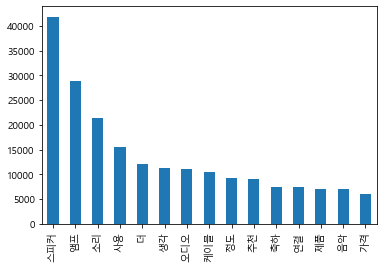

In [24]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')

In [25]:
df['doc_n_str_nouns_str'] = df['doc_n_str_nouns'].apply(lambda x: " ".join(x))

In [26]:
df['doc_n_str_nouns_str']

0        예전 마란츠 세상 제일 전축 시절 가슴 곳 밀고 그게 다가 시절 서민 아파트 채값 ...
1        친구 다인 오디오 보크 유니코듀 중 여러 회원 다인 오디오 보크 후기 비청 영상 세...
2        올해 음반 이제 드보르작 연주가 부페 이반 피셔 주반 이제 음반 헌팅 당분간 올해 ...
3        파워 앰프 구입 음악 뽐뿌 개월 정도 두우 외면 어제 몇개 가성 비 중심 중고 구입...
4        린 프리미엄 가입 린 아침밥 쉬 택배 버선 발 관 짝 두 개 날 외관 소리 축하 누...
                               ...                        
10189       런던 오디오 바 란스 인터 케이블 체험 이벤트 후기 정성 상세 후기 진심 감사 후기
10190    문의 에코 스피커 케이블 오디오 퀘스트 케이블 문의 에코 세 스피커 케이블 오디오 ...
10191    바이 이어링 파바로티 목소리 고역 금속성 소리 덜 위 사진 텍 스피커 케이블 사진 ...
10192    소름 쫙쫙 션 미터 소리 역시 최소 진득 음악 성도 소리 선재 중 세 손가락 만족감...
10193    텍 폴라리스 멀티탭 텍 프리미어 파워 케이블 구입 신입 쇼스타코비치 오늘 텍 멀티탭...
Name: doc_n_str_nouns_str, Length: 10194, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
count_dtm = vector.fit_transform(df['doc_n_str_nouns_str']).toarray() 
print(count_dtm.shape)
print(vector.vocabulary_)

(10194, 31731)
{'예전': 19266, '마란츠': 8131, '세상': 14333, '제일': 23731, '전축': 23311, '시절': 16102, '가슴': 119, '밀고': 10076, '그게': 2565, '다가': 4768, '서민': 13915, '아파트': 17087, '채값': 25479, '그냥': 2571, '는걸': 4659, '인연': 21874, '구해': 2307, '지지': 24709, '잠복': 22678, '해지': 30500, '아덴': 16814, '축하': 26118, '감사': 408, '득탬': 6438, '동시': 6027, '지름': 24615, '고속도로': 1454, '잘못': 22655, '고생': 1449, '브로': 12342, '처음': 25560, '그동안': 2585, '유닛': 20748, '대보': 5263, '밸런스': 10876, '이후': 21752, '스피커': 15765, '마음': 8212, '소리': 14637, '정말': 23497, '세월': 14344, '요즘': 20043, '스픽': 15780, '카바': 26432, '대한': 5380, '갈망': 363, '베리': 11171, '고민': 1435, '중이': 24434, '지오': 24675, '웁니': 20330, '기회': 3109, '청음': 25732, '환영': 31281, '직접': 24806, '최선일': 25988, '거꾸로': 750, '가요': 142, '클래식': 27324, '가끔': 25, '미리': 9941, '쪽지': 25173, '주시': 24232, '모양새': 9199, '느낌': 4639, '역시': 18950, '노이지': 4338, '하동': 29941, '볼트': 11731, '체결': 25761, '무순': 9526, '사연': 13173, '엣지': 18809, '수리': 15014, '소모품': 14661, '인지': 21899, '상태': 13627, '전체'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(df['doc_n_str_nouns_str'])
tfidv_dtm = tfidfv.transform(df['doc_n_str_nouns_str']).toarray()
print(tfidv_dtm.shape)
print(tfidfv.vocabulary_)

(10194, 31731)
{'예전': 19266, '마란츠': 8131, '세상': 14333, '제일': 23731, '전축': 23311, '시절': 16102, '가슴': 119, '밀고': 10076, '그게': 2565, '다가': 4768, '서민': 13915, '아파트': 17087, '채값': 25479, '그냥': 2571, '는걸': 4659, '인연': 21874, '구해': 2307, '지지': 24709, '잠복': 22678, '해지': 30500, '아덴': 16814, '축하': 26118, '감사': 408, '득탬': 6438, '동시': 6027, '지름': 24615, '고속도로': 1454, '잘못': 22655, '고생': 1449, '브로': 12342, '처음': 25560, '그동안': 2585, '유닛': 20748, '대보': 5263, '밸런스': 10876, '이후': 21752, '스피커': 15765, '마음': 8212, '소리': 14637, '정말': 23497, '세월': 14344, '요즘': 20043, '스픽': 15780, '카바': 26432, '대한': 5380, '갈망': 363, '베리': 11171, '고민': 1435, '중이': 24434, '지오': 24675, '웁니': 20330, '기회': 3109, '청음': 25732, '환영': 31281, '직접': 24806, '최선일': 25988, '거꾸로': 750, '가요': 142, '클래식': 27324, '가끔': 25, '미리': 9941, '쪽지': 25173, '주시': 24232, '모양새': 9199, '느낌': 4639, '역시': 18950, '노이지': 4338, '하동': 29941, '볼트': 11731, '체결': 25761, '무순': 9526, '사연': 13173, '엣지': 18809, '수리': 15014, '소모품': 14661, '인지': 21899, '상태': 13627, '전체'

In [29]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns'])
print(dictionary)

Dictionary(33087 unique tokens: ['가끔', '가슴', '가요', '갈망', '감사']...)


In [30]:
print(dictionary.doc2bow(df.loc[0,'doc_n_str_nouns']))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 3), (59, 1), (60, 2), (61, 6), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 12), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 2)

In [31]:
corpus = [dictionary.doc2bow(text) for text in df['doc_n_str_nouns']]

print(corpus[0])

for i in range(5):
    print(dictionary[i])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 3), (59, 1), (60, 2), (61, 6), (62, 1), (63, 2), (64, 1), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 12), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 2)

In [163]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,30):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda =CoherenceModel(model=ldamodel, texts=df['doc_n_str_nouns'], dictionary = dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number o

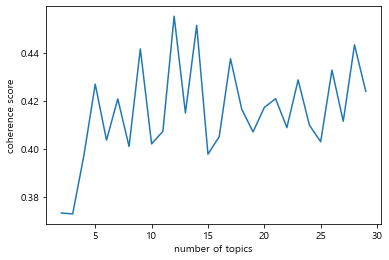

In [164]:
x=range(2,30)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show() 

In [32]:
import gensim
import matplotlib.pyplot as plt

NUM_TOPICS = 12 #12개의 토픽, k=12
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
print(topics)

[(0, '0.085*"랜" + 0.077*"허브" + 0.075*"공유기" + 0.052*"랜선"'), (1, '0.033*"소리" + 0.013*"느낌" + 0.011*"진공관" + 0.011*"앰프"'), (2, '0.048*"스피커" + 0.031*"앰프" + 0.018*"추천" + 0.018*"사용"'), (3, '0.096*"채널" + 0.080*"리시버" + 0.062*"사운드" + 0.057*"티비"'), (4, '0.076*"케이블" + 0.033*"스피커" + 0.026*"단자" + 0.022*"선"'), (5, '0.116*"앰프" + 0.045*"스피커" + 0.037*"프리" + 0.029*"파워"'), (6, '0.022*"노이즈" + 0.021*"사용" + 0.019*"소리" + 0.015*"기기"'), (7, '0.061*"스피커" + 0.016*"소리" + 0.014*"우퍼" + 0.014*"저음"'), (8, '0.030*"연결" + 0.026*"네트워크" + 0.026*"음질" + 0.026*"타이"'), (9, '0.094*"사부" + 0.072*"작" + 0.040*"딩" + 0.034*"포스트"'), (10, '0.049*"축하" + 0.013*"정말" + 0.011*"전" + 0.009*"집"'), (11, '0.021*"스피커" + 0.019*"소리" + 0.018*"앰프" + 0.015*"생각"')]


In [33]:
for topic in topics:
    print(topic)

(0, '0.085*"랜" + 0.077*"허브" + 0.075*"공유기" + 0.052*"랜선"')
(1, '0.033*"소리" + 0.013*"느낌" + 0.011*"진공관" + 0.011*"앰프"')
(2, '0.048*"스피커" + 0.031*"앰프" + 0.018*"추천" + 0.018*"사용"')
(3, '0.096*"채널" + 0.080*"리시버" + 0.062*"사운드" + 0.057*"티비"')
(4, '0.076*"케이블" + 0.033*"스피커" + 0.026*"단자" + 0.022*"선"')
(5, '0.116*"앰프" + 0.045*"스피커" + 0.037*"프리" + 0.029*"파워"')
(6, '0.022*"노이즈" + 0.021*"사용" + 0.019*"소리" + 0.015*"기기"')
(7, '0.061*"스피커" + 0.016*"소리" + 0.014*"우퍼" + 0.014*"저음"')
(8, '0.030*"연결" + 0.026*"네트워크" + 0.026*"음질" + 0.026*"타이"')
(9, '0.094*"사부" + 0.072*"작" + 0.040*"딩" + 0.034*"포스트"')
(10, '0.049*"축하" + 0.013*"정말" + 0.011*"전" + 0.009*"집"')
(11, '0.021*"스피커" + 0.019*"소리" + 0.018*"앰프" + 0.015*"생각"')


In [34]:
for topic in ldamodel.print_topics():
    print(topic)

(0, '0.085*"랜" + 0.077*"허브" + 0.075*"공유기" + 0.052*"랜선" + 0.028*"드라이버" + 0.027*"데이브" + 0.014*"관세" + 0.011*"윈도우" + 0.010*"유선" + 0.010*"모뎀"')
(1, '0.033*"소리" + 0.013*"느낌" + 0.011*"진공관" + 0.011*"앰프" + 0.011*"더" + 0.010*"생각" + 0.007*"사용" + 0.007*"정도" + 0.007*"관" + 0.007*"용기"')
(2, '0.048*"스피커" + 0.031*"앰프" + 0.018*"추천" + 0.018*"사용" + 0.014*"제품" + 0.013*"오디오" + 0.011*"만원" + 0.011*"구매" + 0.011*"정도" + 0.010*"음악"')
(3, '0.096*"채널" + 0.080*"리시버" + 0.062*"사운드" + 0.057*"티비" + 0.048*"영화" + 0.036*"바" + 0.035*"센터" + 0.026*"뮤" + 0.022*"션" + 0.018*"리"')
(4, '0.076*"케이블" + 0.033*"스피커" + 0.026*"단자" + 0.022*"선" + 0.015*"포노" + 0.012*"연결" + 0.012*"소리" + 0.011*"사용" + 0.010*"쪽" + 0.010*"선재"')
(5, '0.116*"앰프" + 0.045*"스피커" + 0.037*"프리" + 0.029*"파워" + 0.025*"출력" + 0.023*"볼륨" + 0.018*"사용" + 0.015*"모노" + 0.015*"인티" + 0.012*"옴"')
(6, '0.022*"노이즈" + 0.021*"사용" + 0.019*"소리" + 0.015*"기기" + 0.014*"전원" + 0.012*"문제" + 0.010*"디지털" + 0.009*"제품" + 0.008*"생각" + 0.008*"소스"')
(7, '0.061*"스피커" + 0.016*"소리" + 0.014*"우퍼" + 0.014

In [35]:
#df = pd.read_csv('naver_cafe_speaker_all_data_split_sentence_noun_one_word_list.csv', encoding='utf-8-sig')

In [36]:
df['doc_n_str_nouns_one_word_list']

0        [예전, 마란츠, 세상, 제일, 전축, 시절, 가슴, 곳, 밀고, 그게, 다가, 시...
1        [친구, 다인, 오디오, 보크, 유니코듀, 중, 여러, 회원, 다인, 오디오, 보크...
2        [올해, 음반, 이제, 드보르작, 연주가, 부페, 이반, 피셔, 주반, 이제, 음반...
3        [파워, 앰프, 구입, 음악, 뽐뿌, 개월, 정도, 두우, 외면, 어제, 몇개, 가...
4        [린, 프리미엄, 가입, 린, 아침밥, 쉬, 택배, 버선, 발, 관, 짝, 두, 개...
                               ...                        
10189    [런던, 오디오, 바, 란스, 인터, 케이블, 체험, 이벤트, 후기, 정성, 상세,...
10190    [문의, 에코, 스피커, 케이블, 오디오, 퀘스트, 케이블, 문의, 에코, 세, 스...
10191    [바이, 이어링, 파바로티, 목소리, 고역, 금속성, 소리, 덜, 위, 사진, 텍,...
10192    [소름, 쫙쫙, 션, 미터, 소리, 역시, 최소, 진득, 음악, 성도, 소리, 선재...
10193    [텍, 폴라리스, 멀티탭, 텍, 프리미어, 파워, 케이블, 구입, 신입, 쇼스타코비...
Name: doc_n_str_nouns_one_word_list, Length: 10194, dtype: object

In [37]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns_one_word_list'])
print(dictionary)

Dictionary(33087 unique tokens: ['가끔', '가슴', '가요', '갈망', '감사']...)


In [38]:
from gensim import corpora
dictionary = corpora.Dictionary(df['doc_n_str_nouns_one_word_list'])
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in df['doc_n_str_nouns_one_word_list']]

NUM_TOPICS = 12 #12개의 토픽, k=12
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

Dictionary(33087 unique tokens: ['가끔', '가슴', '가요', '갈망', '감사']...)


In [39]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

prepared_data = gensimvis.prepare(ldamodel, corpus, dictionary)
prepared_data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.117424 -0.071392       1        1  30.802479
1      0.050117 -0.186172       2        1  14.417333
0      0.112440  0.055526       3        1  12.252523
6      0.057982 -0.155702       4        1   8.574379
9      0.088191  0.059178       5        1   6.880988
5      0.098871  0.014268       6        1   6.076193
2      0.052797  0.033512       7        1   5.452912
11     0.060011 -0.179824       8        1   5.061846
7      0.044963  0.194840       9        1   4.521939
8      0.047548  0.242062      10        1   4.457079
4     -0.369693 -0.038799      11        1   0.852578
3     -0.360652  0.032506      12        1   0.649751, topic_info=     Term          Freq         Total Category  logprob  loglift
58    스피커  38071.000000  38071.000000  Default  30.0000  30.0000
400    앰프  31220.000000  31220.000000  Default  29.0000  29.0000
609   케이블   9348.000000   9348.000000  Default  28.0000  28.0000
512   리시버   3375.000000   3375.000000  Default  27.0000  27.0000
55     소리  21296.000000  21296.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
1062  노이즈     78.410967   2422.252088  Topic12  -4.7633   1.6058
1387   수준     62.461497   1107.749412  Topic12  -4.9907   2.1608
1509   게인     48.073062    328.193701  Topic12  -5.2525   3.1155
1224  화이트     49.923214    594.215885  Topic12  -5.2147   2.5596
841     시     53.179859   2582.978199  Topic12  -5.1515   1.1533

[873 rows x 6 columns], token_table=      Topic      Freq Term
term                      
345       1  0.768194   가격
345       2  0.196058   가격
345       5  0.022784   가격
345       6  0.009593   가격
345       7  0.002998   가격
...     ...       ...  ...
284       6  0.014690    힘
284       7  0.015390    힘
284       8  0.252534    힘
284       9  0.104232    힘
3190      1  0.995097   힙합

[2257 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 2, 1, 7, 10, 6, 3, 12, 8, 9, 5, 4])

In [73]:
from wordcloud import WordCloud
font_path='c:/Windows/Fonts/'
cloud = WordCloud(font_path=font_path+'gulim.ttc', width=800, height=600).generate(" ".join(df['doc_n_str_nouns_str']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 799.5, 599.5, -0.5)

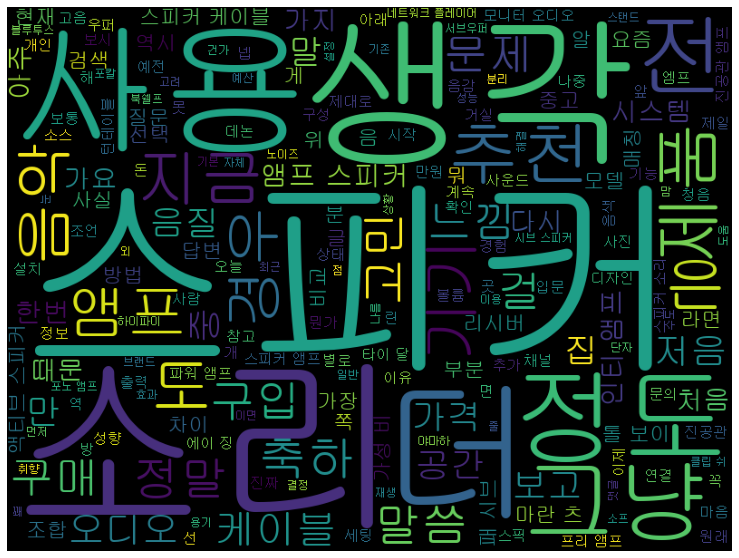

In [74]:
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [75]:
word01 = " ".join(df['doc_n_str_nouns_str'])                

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
wc = WordCloud(background_color='white', #워드클라우드 배경화면 하얀색
              width=1020, height=680, #너비랑 높이 지정
              font_path=font_path+'malgun.ttf', #글씨체 한글로 해야함
               max_font_size=120 #제일 큰 폰트 사이즈 지정
              ,max_words=100, #표시될 단어의 갯수 
               stopwords=set(['스피커']) #불용어 지정
              ).generate(word01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 1019.5, 679.5, -0.5)

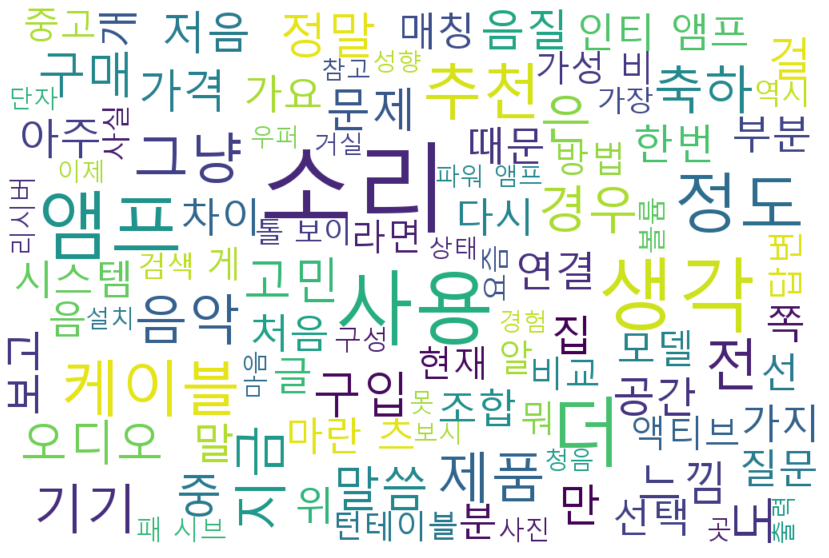

In [77]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear',cmap='YlOrBr')
plt.axis('off')